In [241]:
import sympy as sp
from sympy import oo

In [242]:
alpha, beta = sp.symbols('alpha beta', positive = True, real = True)
r, theta, phi= sp.symbols('r theta phi', positive = True, real = True)

In [243]:
psi_i = sp.exp(-alpha*r**2)
psi_j = sp.exp(-beta*r**2)

In [244]:
def integrate(expr):
    return sp.integrate(expr * r**2 * sp.sin(theta), (phi,0,2*sp.pi),(theta, 0, sp.pi), (r, 0, oo)).simplify()

In [245]:
N = sp.sqrt(1/integrate(psi_i * psi_i))
print(N)

2**(3/4)*alpha**(3/4)/pi**(3/4)


In [246]:
S = integrate(psi_i*psi_j)
print(S)

pi**(3/2)/(alpha + beta)**(3/2)


In [247]:
alpha,beta,gamma,delta = sp.symbols('alpha beta gamma delta', 
                                    real = True, positive = True)
p,q = sp.symbols('p q', real = True, positive = True)
psi_i = sp.exp(-p*r1**2)
psi_j = sp.exp(-q*r2**2)
r1, r2, r12 = sp.symbols('r1 r2 r12', real = True, positive = True)
I1 = sp.integrate(psi_i*psi_j*r1*r2,(r12,r1-r2,r1+r2),(r2,0,r1),(r1,0,oo)).simplify()
I2 = sp.integrate(psi_i*psi_j*r1*r2,(r12,r2-r1,r1+r2),(r2,r1,oo),(r1,0,oo)).simplify()
I = sp.simplify(8*sp.pi**2*(I1 + I2))
print(I)

2*pi**(5/2)/(p*q*sqrt(p + q))


In [248]:
def T(psi):
    return sp.simplify(-(psi.diff(r,2) - (2/r)*psi.diff(r))/2)
def V(psi):
    return -2*psi/r
def H(psi):
    return T(psi) + V(psi)

In [249]:
Tij = integrate(psi_i*T(psi_j))
Vij = integrate(psi_i*V(psi_j))
print(Vij.simplify())

-oo


In [250]:
import numpy as np

In [251]:
def N(alpha):
    return 2**(3/4)*alpha**(3/4)/np.pi**(3/4)
def Sij(alpha, beta):
    return N(alpha)*N(beta)*np.pi**(3/2)/(alpha + beta)**(3/2)
def Tij(alpha,beta):
    return N(alpha)*N(beta)*3*np.pi**(3/2)*alpha*beta/(alpha + beta)**(5/2)
def Vij(alpha, beta):
    return -4*np.pi/(alpha + beta)*N(alpha)*N(beta)  
def Hij(alpha, beta):
    return Tij(alpha,beta)+Vij(alpha,beta)
def Gijkl(alpha, beta, gamma, delta):
    p = alpha + beta
    q = gamma + delta
    return 2*np.pi**(5/2)/(p*q*np.sqrt(p + q))*N(alpha)*N(beta)*N(gamma)*N(delta)

In [252]:
exps = np.array([0.05*(4.**n) for n in range(5)])
#exps = np.array([0.05,0.10,0.20,0.4,0.8,1.6,3.2,6.4,12.8,24.,48.0])

In [253]:
A, B = np.meshgrid(exps,exps,indexing='ij')
I, J, K, L = np.meshgrid(exps,exps,exps,exps,indexing='ij')

In [254]:
from scipy.linalg import eigh
import matplotlib.pyplot as plt

In [259]:
S = Sij(A,B)
H = Hij(A,B)
G = Gijkl(I,J,K,L)
print(Tij(A,B))

[[7.50000000e-02 8.58650103e-02 4.55747105e-02 1.80371458e-02
  6.56482848e-03]
 [8.58650103e-02 3.00000000e-01 3.43460041e-01 1.82298842e-01
  7.21485831e-02]
 [4.55747105e-02 3.43460041e-01 1.20000000e+00 1.37384017e+00
  7.29195368e-01]
 [1.80371458e-02 1.82298842e-01 1.37384017e+00 4.80000000e+00
  5.49536066e+00]
 [6.56482848e-03 7.21485831e-02 7.29195368e-01 5.49536066e+00
  1.92000000e+01]]


In [213]:
energy_list = []
c_list = []
c = np.ones(exps.shape)
c /= np.sqrt(c.T @ S @ c)


In [218]:
maxit = 100
for iteration in range(maxit):
    J = np.einsum('ijkl,k,l -> ij',G,c,c)
    F = H + J
    e, Cmat = eigh(F, S)
    c_new = Cmat[:, epsilon.argmin()]
    c_new /= np.sqrt(c_new.T @ S @ c_new)
    
    # total Hartree energy
    E = 2*(c_new.T @ H @ c_new) + (c_new.T @ J @ c_new)
    energy_list.append(E)
    print(f"SCF-Iteration  {it:2d}   E = {E:.10f}")
    c_list.append(c_new.copy())
    if np.linalg.norm(c_new - c) < 1e-6:
        break
    c = c_new

SCF-Iteration   9   E = -2.8593923525


In [220]:
plt.plot(energy_list,'o')
plt.plot(energy_list)
plt.show()

## with visualization

In [222]:
energy_list = []
c_list = []
c = np.ones(exps.shape)
c /= np.sqrt(c.T @ S @ c)
maxit = 100

F_frames = []
dF_frames = []
F_old = None
for iteration in range(maxit):
    J = np.einsum('ijkl,k,l -> ij',G,c,c)
    F = H + J
    e, Cmat = eigh(F, S)
    c_new = Cmat[:, epsilon.argmin()]
    c_new /= np.sqrt(c_new.T @ S @ c_new)
    
    F_frames.append(F.copy())

    if F_old is None:
        dF_frames.append(np.zeros_like(F))
    else:
        dF_frames.append(F - F_old)

    F_old = F.copy()

    # total Hartree energy
    E = 2*(c_new.T @ H @ c_new) + (c_new.T @ J @ c_new)
    energy_list.append(E)
    print(f"SCF-Iteration  {it:2d}   E = {E:.10f}")
    c_list.append(c_new.copy())
    if np.linalg.norm(c_new - c) < 1e-6:
        break
    c = c_new

SCF-Iteration   9   E = -2.6358731987
SCF-Iteration   9   E = -2.9487458719
SCF-Iteration   9   E = -2.8335621120
SCF-Iteration   9   E = -2.8671111253
SCF-Iteration   9   E = -2.8571331356
SCF-Iteration   9   E = -2.8600562978
SCF-Iteration   9   E = -2.8591968348
SCF-Iteration   9   E = -2.8594492403
SCF-Iteration   9   E = -2.8593750899
SCF-Iteration   9   E = -2.8593968713
SCF-Iteration   9   E = -2.8593904730
SCF-Iteration   9   E = -2.8593923525


<IPython.core.display.Javascript object>


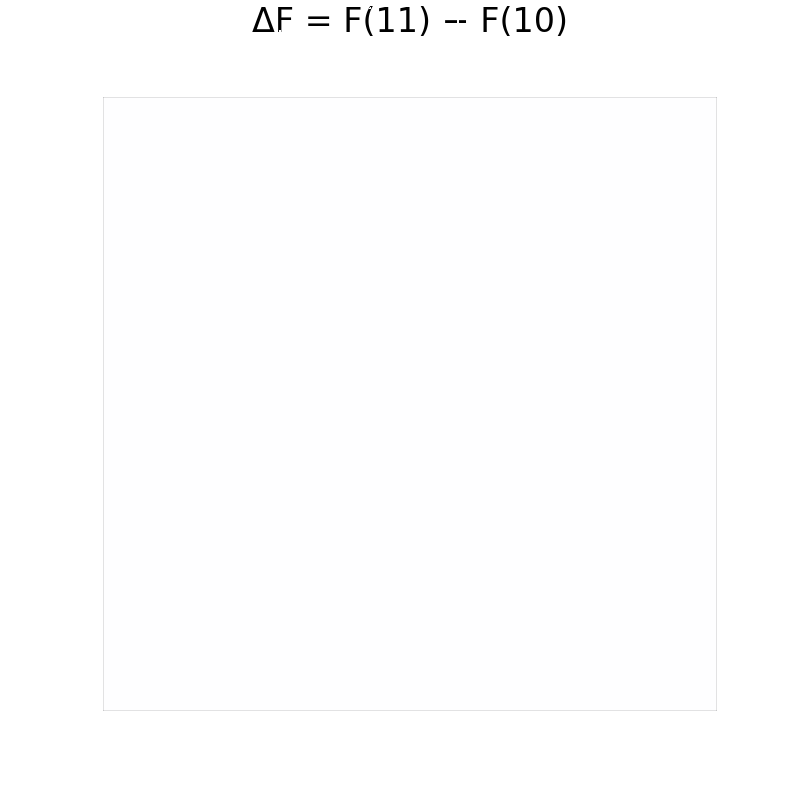

In [224]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np

# colour scale for ΔF
dFmax = max(np.max(np.abs(m)) for m in dF_frames if np.any(m))

fig, ax = plt.subplots(figsize=(4,4))

def update(i):
    ax.clear()
    ax.set_title(f"ΔF = F({i}) − F({i-1})")
    cax = ax.matshow(dF_frames[i], cmap="bwr", vmin=-dFmax, vmax=dFmax)
    return [cax]

anim = FuncAnimation(fig, update, frames=len(dF_frames), interval=1000)
HTML(anim.to_jshtml())

